# MNIST
This notebook shows sample-based explanations for individual test predictions for a tree ensemble trained on two or more classes in the MNIST dataset. We show the raw images for the test instance (1), and the raw images for the most impactful train instances; positive (2-4) and negative (5-7).

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts
sys.path.insert(0, os.getcwd() + '/../../')  # for TREX

from scripts.mnist import prediction_explanation
data_dir = '../../data'

### 4s and 9s
We filter the train and test sets of MNIST to images containing either the label 4 or 9. We then train an LGB model on this two-class dataset and randomly choose a test instance to predict and explain.

train instances: 11791
test instances: 1991
labels: [4, 9]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (11791, 50)
classes: [4 9]
linear_model: KernelLogisticRegression(C=0.1, pred_size=1000)
encoding: leaf_output
dense_output: True
fit predicted labels: False
random state: 7

model (LGBMClassifier)
train set acc: 0.999576
train log loss: 0.02077
train auroc: 1.000
test set acc: 0.976394
test log loss: 0.06789
test auroc: 0.998


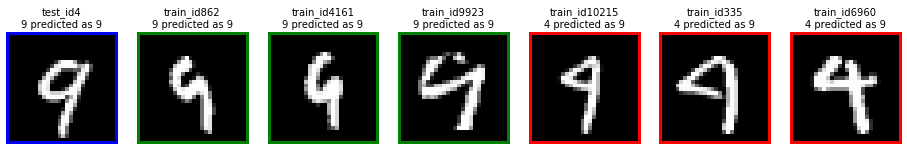

In [2]:
prediction_explanation(model='lgb', encoding='leaf_output', dataset='mnist_49', linear_model='lr',
                       kernel='linear', true_label=True, random_state=7, topk_train=3, data_dir=data_dir)

We can see that the most negative samples are 4s that take could be misconstrued as 9s and were actually mispredicted by the model.

Next, we look at an explanation using an SVM with an RBF kernel.

train instances: 11791
test instances: 1991
labels: [4, 9]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (11791, 50)
classes: [4 9]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='rbf', pred_size=500,
    random_state=8)
encoding: leaf_output
dense_output: True
fit predicted labels: True
random state: 8

model (LGBMClassifier)
train set acc: 0.999661
train log loss: 0.02076
train auroc: 1.000
test set acc: 0.975892
test log loss: 0.06847
test auroc: 0.998


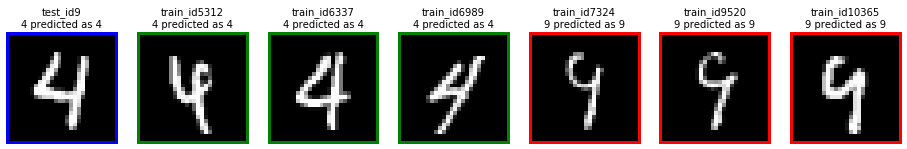

In [3]:
prediction_explanation(model='lgb', encoding='leaf_output', dataset='mnist_49', linear_model='svm',
                       kernel='rbf', true_label=False, random_state=8, topk_train=3, data_dir=data_dir)

We can see from this explanation that the inhibitory training examples are 9s that may be interpreted as 4s.

### 6s and 9s
We also look at 6s and 9s as they can sometimes be misconstrued.

train instances: 11867
test instances: 1967
labels: [6, 9]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (11867, 50)
classes: [6 9]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='rbf', pred_size=500,
    random_state=1)
encoding: leaf_output
dense_output: True
fit predicted labels: True
random state: 1

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00006
train auroc: 1.000
test set acc: 0.993899
test log loss: 0.02043
test auroc: 1.000


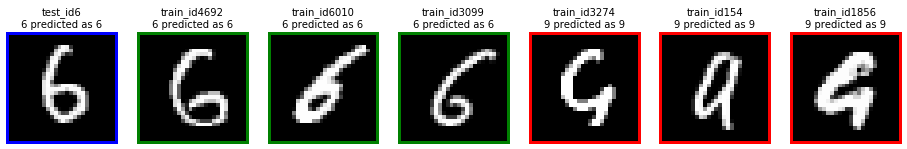

In [4]:
prediction_explanation(model='lgb', encoding='leaf_output', dataset='mnist_69', linear_model='svm',
                       kernel='rbf', true_label=False, random_state=1, topk_train=3, data_dir=data_dir)

Again, we see some of the 9s looking like 6s in some cases.